In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error,r2_score


In [40]:
path = r"D:\2.ProjectWork\1.TEX\24TEX_003\24TEX_003_P03\24TEX_003_P03_04_1"

np.random.seed(1)

file_detials = os.listdir(path)


data_train = []
for file in file_detials:
    file_path = os.path.join(path,file)
    df = pd.read_excel(file_path)
    data_train.append(df)
all_data = pd.concat(data_train)

ind_list = []
dep_list = []
columns = all_data.columns
for names in columns:
    if names.startswith("T"):
        ind_list.append(names)
    elif names.startswith("X"):
        dep_list.append(names)

ind_data = []
for temp in ind_list:
    ind_data.append(all_data[temp])
    independent = pd.concat(ind_data,axis=1)
x = independent.drop(['Time'],axis = 1)

dep_data = []
for dev in dep_list:
    dep_data.append(all_data[dev])
    dependent = pd.concat(dep_data,axis=1)
y = dependent - dependent.iloc[0]


x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.10, random_state=101,shuffle= False)

knn = KNeighborsRegressor(n_neighbors=40)

knn.fit(x_train,y_train)
prediction = knn.predict(x_test)
error = y_test - prediction

print("MSE:",mean_squared_error(y_test,prediction))

MSE: 4.601431068856948


In [41]:
# mse_list = []

# for i in range(1,100):
#     knn = KNeighborsRegressor(n_neighbors=i)
#     knn.fit(x_train,y_train)
#     prediction = knn.predict(x_test)
#     error = y_test - prediction
#     mse = mean_squared_error(y_test,prediction)
#     mse_list.append(mse)

# plt.figure(figsize=(10,6))
# plt.plot(range(1,100),mse_list,color = 'blue',linestyle = 'dashed', marker = 'o',markerfacecolor = 'red', markersize = 10)
# plt.title('K vs MSE')
# plt.xlabel('K')
# plt.ylabel('MSE')

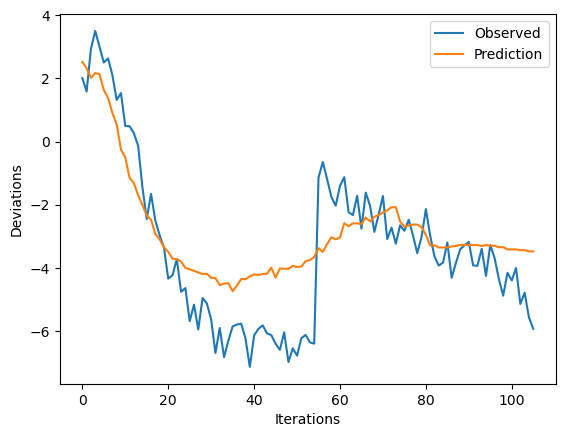

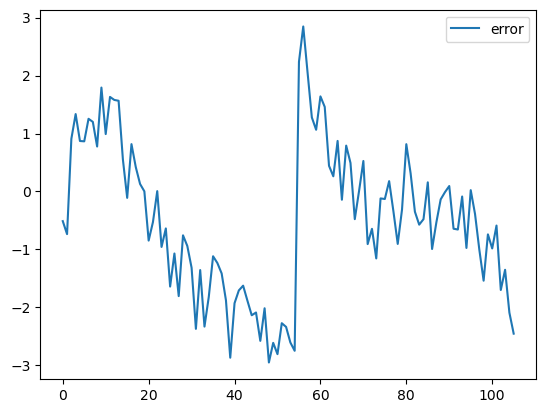

10.643659000000014
7.2605828359999975
5.798835774999992
r2 score: 0.7103631114886215
MSE: 1.923405758491727


In [42]:
val_file = ['24TEX_003_P03_04_240919']

val_file = [file + ".xlsx" for file in val_file]

# TEST CODE
data_val = []
for file in val_file:
    val_file_path = os.path.join(path,file)
    df_val = pd.read_excel(val_file_path)
    data_val.append(df_val)
val_data = pd.concat(data_val)


ind_list_val = []
dep_list_val = []
columns_test = val_data.columns
for names_val in columns_test:
    if names_val.startswith("T"):
        ind_list_val.append(names_val)
    elif names_val.startswith("X"):
        dep_list_val.append(names_val)

ind_data_val = []
for temp_val in ind_list_val:
    ind_data_val.append(val_data[temp_val])
    independent_val = pd.concat(ind_data_val,axis=1)
x_val = independent_val.drop(['Time'],axis = 1)

dep_data_val = []
for dev_val in dep_list_val:
    dep_data_val.append(val_data[dev_val])
    dependent_val = pd.concat(dep_data_val,axis=1)
y_val = dependent_val - dependent.iloc[0]


#Predicting result for Single Observation
prediction = knn.predict(x_val)
error = y_val - prediction


plt.plot(y_val, label= 'Observed')
plt.plot(prediction, label= 'Prediction')
plt.xlabel('Iterations')
plt.ylabel('Deviations')
plt.legend()
plt.show()


plt.plot(error,label='error') 
plt.legend() 
plt.show() 


print(np.max(y_val) - np.min(y_val))
print(np.max(prediction) - np.min(prediction))
print(np.max(error) - np.min(error))
print("r2 score:",r2_score(y_val,prediction))
print("MSE:",mean_squared_error(y_val,prediction))
